<a href="https://colab.research.google.com/github/avi78/Tensorflow-day-1/blob/main/Intel_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"akrutisarangi","key":"b0e3dadd3641210e9deb66b6b12fbb81"}'}

In [ ]:
!ls -lha kaggle.json

!pip install -q Kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets list -s image

-rw-r--r-- 1 root root 69 Feb 10 08:47 kaggle.json
ref                                               title                                      size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------  ----------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muratkokludataset/pistachio-image-dataset         Pistachio Image Dataset                    27MB  2022-03-28 18:01:27           2321       1545  0.9375           
muratkokludataset/rice-image-dataset              Rice Image Dataset                        219MB  2022-04-03 02:12:00           6990       1648  0.875            
puneet6060/intel-image-classification             Intel Image Classification                346MB  2019-01-30 09:22:58          72187       1272  0.75             
vishalsubbiah/pokemon-images-and-types            Pokemon Image Dataset                       2MB  2018-12-17 01:01:39          2

In [ ]:
!kaggle datasets download -d puneet6060/intel-image-classification

!unzip intel-image-classification.zip

intel-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  intel-image-classification.zip
replace seg_pred/seg_pred/10004.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace seg_pred/seg_pred/10005.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace seg_pred/seg_pred/10012.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace seg_pred/seg_pred/10013.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
train = "seg_train/seg_train"
test = "seg_test/seg_test"
     

In [ ]:
import tensorflow as tf
import os 
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:

os.listdir(train)

['mountain', 'street', 'glacier', 'forest', 'sea', 'buildings']

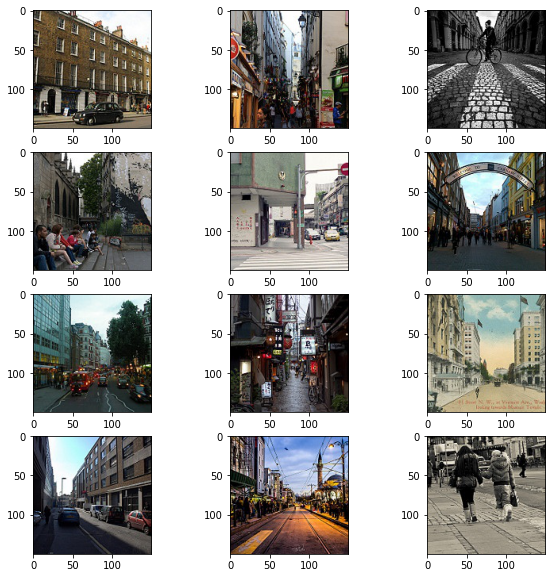

In [ ]:
choice = 'street'
plt.figure(figsize=(10,10))
for i in range(12):
  plt.subplot(4,3,i+1)
  path = f"{train}/{choice}/"
  images = os.listdir(path)
  img = plt.imread(f"{path+images[i]}")
  plt.imshow(img)

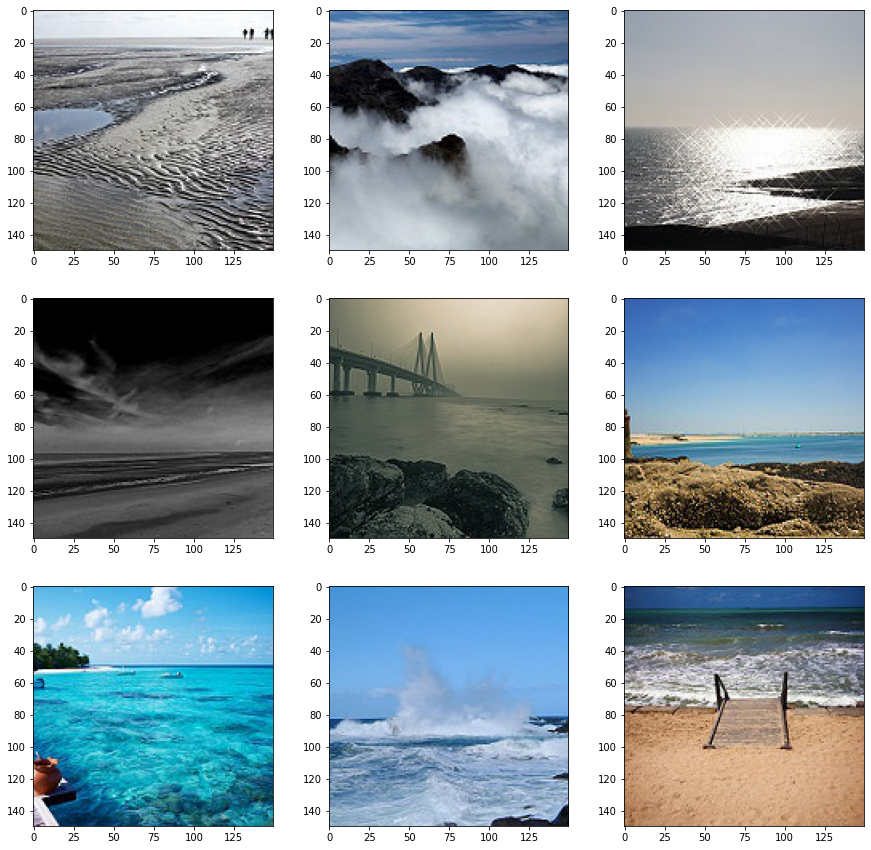

In [ ]:

plt.figure(figsize=(15,15))
for i in range(9):
  plt.subplot(3,3,i+1)
  choice = "sea"
  path = os.listdir(f"{train}/{choice}")[i]
  img = plt.imread(f"{train}/{choice}/{path}")
  plt.imshow(img)

In [ ]:
train_image_generate = ImageDataGenerator(rescale = 1/255.0,
                               rotation_range=45,
                               zoom_range=0.2 
)

In [ ]:
test_image_generate = ImageDataGenerator(rescale = 1/255.0)

In [ ]:
training_data = train_image_generate.flow_from_directory(train,
                                   batch_size=32,
                                   target_size=(224,224),
                                   class_mode='categorical')

Found 14034 images belonging to 6 classes.


In [ ]:
testing_data = test_image_generate.flow_from_directory(test,
                                   batch_size=32,
                                   target_size=(224,224),
                                   class_mode='categorical')

Found 3000 images belonging to 6 classes.


In [ ]:
for image,label in training_data:
    print(image.shape)
    print(label.shape)
    break

(32, 224, 224, 3)
(32, 6)


In [ ]:
model = keras.models.Sequential()   # second approach of adding layers
model.add(keras.layers.Conv2D(32,3,input_shape=(224,224,3)))
model.add(keras.layers.MaxPooling2D())   #only 1 d array for hidden layers
model.add(keras.layers.Conv2D(64,3,activation="relu"))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dense(6,activation="softmax"))

#### For optimizer you can use either "adam" or "rmsprop"

In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy")

In [ ]:
history = model.fit(training_data,validation_data=testing_data,epochs=5,steps_per_epoch = 100)

Epoch 1/5


ValueError: ignored

In [ ]:
model.save("Intel_model.h5")

In [ ]:
from keras.models import load_model

In [ ]:
saved_model = load_model("Intel_model.h5")

In [ ]:
model.summary()  # 224-3)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dense_4 (Dense)             (None, 54, 54, 128)       8320      
                                                                 
 dense_5 (Dense)             (None, 54, 54, 6)        

In [ ]:
path = f"{test}/mountain"
random_image= os.listdir(path)[0]
img= plt.imread(f"{path}/{random_image}")
plt.imshow(img)

SyntaxError: ignored

In [1]:
from tendorflow.keras.preprocessing.image import load_img,img_to_array

ModuleNotFoundError: ignored

In [2]:
img= load_img(f"{path}/{random_image}",target_size=(224,224,3))

NameError: ignored

In [ ]:
x= img_to_array(img)
x.shape

In [ ]:
x= np.expand_dims(x,axis=0)

In [ ]:
x.shape

In [ ]:
target= model.predict(x)
prediction = np.argmax(target)

In [ ]:
prediction

In [ ]:
labels= os.listdir(train)
labels.sort()
labels[prediction]